# Onset Dates

This notebook performs an analysis of the onset date datasets used in the thesis.

In [1]:
import pandas as pd
import seaborn as sns
import arrow as ar
import matplotlib.pyplot as plt

% matplotlib inline

In [2]:
CUT_BEFORE_1979 = True

In [3]:
def create_onset_hist(df, title, filename):
    ax = sns.distplot(df)

    ax.set(xlabel='Delta in Days from 01.03 to MoK', title=title)
    ax.title.set(position=[.5, 1.05], size=15)
    ax.xaxis.labelpad = 10
    ax.xaxis.label.set(size=15)

    ax.get_figure().savefig(f'output/{filename}{"_uncut" if not CUT_BEFORE_1979 else ""}.png', bbox_inches='tight')
    
def create_onset_jointplot(df, y, title, filename):
    g = sns.jointplot(x="year", y=y, kind='reg', data=df)

    g.ax_joint.set(xlabel='Year', ylabel='Delta in Days from 01.03 to MoK', title=title)
    g.ax_joint.title.set(position=[.5, 1.05], size=15)
    g.ax_joint.xaxis.labelpad = 10
    g.ax_joint.xaxis.label.set(size=15)
    g.ax_joint.yaxis.labelpad = 10
    g.ax_joint.yaxis.label.set(size=15)
    g.ax_marg_x.set_visible(False)

    g.fig.savefig(f'output/{filename}{"_uncut" if not CUT_BEFORE_1979 else ""}.png', bbox_inches='tight')

## Version 1

### Dataset 

Version 1 of the onset dates were used for the experiments up to ERA1 and TRMM5.

They were later replaced with more objective dates for better accuracy. Furthermore, the dataset was/is incomplete in that 1971 as well as more current years were missing. Recent years were filled in with official IMD dates while 1971 didn't matter as TRMM as well as ERA start later on (1998 and 1979 respectively).

Source:

In [4]:
# read in the dataset
df_v1 = pd.read_csv('../00_DATA/onset_dates_v1.csv')
df_v1['year'] = df_v1['onset'].apply(lambda string: ar.get(string, 'YYYY').datetime.year)

if CUT_BEFORE_1979:
    # filter years before 1979 (start of ERA)
    df_v1 = df_v1[df_v1['year'] >= 1979]
    
df_v1.head()

,onset,year
72,9 Jun 1979,1979
73,28 May 1980,1980
74,25 May 1981,1981
75,3 Jun 1982,1982
76,8 Jun 1983,1983


In [5]:
# process onset date to remove year component
df_v1['onset_proc'] = df_v1['onset'].apply(lambda string: ar.get(string, 'D MMM'))

# calculate the delta in days from start of pre-monsoon season
start_doy = ar.get('1 Mar', 'D MMM')
df_v1['onset_delta']  = (df_v1['onset_proc'] - start_doy).dt.days

df_v1.tail()

,onset,year,onset_proc,onset_delta
106,22 May 2013,2013,0001-05-22T00:00:00+00:00,82
107,06 Jun 2014,2014,0001-06-06T00:00:00+00:00,97
108,05 Jun 2015,2015,0001-06-05T00:00:00+00:00,96
109,08 Jun 2016,2016,0001-06-08T00:00:00+00:00,99
110,30 May 2017,2017,0001-05-30T00:00:00+00:00,90


### Distribution and Summary Statistics

The distribution of onset dates is skewed towards later onsets but contains some outliers on the far left side (very early onsets, sometimes almost unrealistically early). These onsets might for example be caused by bogus onsets that were not detected properly at the time.

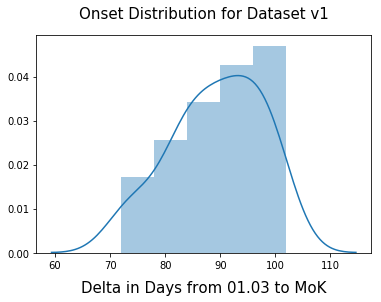

In [6]:
create_onset_hist(df_v1['onset_delta'], 'Onset Distribution for Dataset v1', 'onset_hist_v1')

In [7]:
# calculate summary statistics
# sns.boxplot(y="onset_delta", data=df_v1, palette="PRGn")
df_v1.describe()

,year,onset_delta
count,39.000000,39.000000
mean,1998.000000,89.282051
std,11.401754,8.261989
min,1979.000000,72.000000
25%,1988.500000,83.500000
50%,1998.000000,90.000000
75%,2007.500000,96.000000
max,2017.000000,102.000000


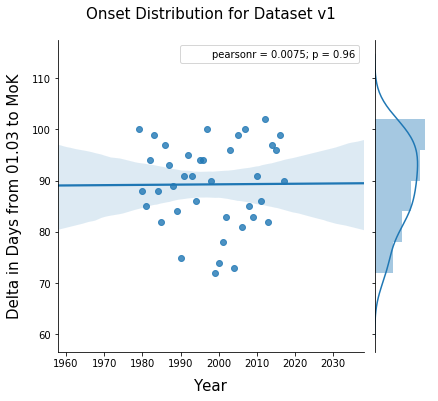

In [8]:
create_onset_jointplot(df_v1, 'onset_delta', 'Onset Distribution for Dataset v1', 'onset_joint_v1')

## Version 2

### Dataset

Version 2 of the onset dates is used for the latest experiments (after ERA1 and TRMM5). The underlying dataset is split into official IMD dates and dates calculated based on NCEP/NCAR with objective criteria. The IMD uses (better) objective criteria from 2006 onwards, so the missing years from 2007 to 2017 have been filled with official IMD dates for both columns.

In [9]:
# read in the dataset
df_v2 = pd.read_csv('../00_DATA/onset_dates_v2.csv', sep=';')

# filter years before 1979 (start of ERA)
if CUT_BEFORE_1979:
    df_v2 = df_v2[df_v2['year'] >= 1979]

df_v2.head()

,year,imd,objective,eg_objective
19,1979,16 Jun 1979,18 Jun 1979,24 Jun 1979
20,1980,4 Jun 1980,6 Jun 1980,17 Jun 1980
21,1981,1 Jun 1981,4 Jun 1981,20 Jun 1981
22,1982,1 Jun 1982,10 Jun 1982,20 Jun 1982
23,1983,16 Jun 1983,17 Jun 1983,25 Jun 1983


In [10]:
# process onset dates to remove year component
df_v2['imd_proc'] = df_v2['imd'].apply(lambda string: ar.get(string, 'D MMM'))
df_v2['obj_proc'] = df_v2['objective'].apply(lambda string: ar.get(string, 'D MMM'))

# calculate the deltas in days from start of pre-monsoon season
start_doy = ar.get('1 Mar', 'D MMM')
df_v2['imd_delta'] = (df_v2['imd_proc'] - start_doy).dt.days
df_v2['obj_delta'] = (df_v2['obj_proc'] - start_doy).dt.days

df_v2.head()

,year,imd,objective,eg_objective,imd_proc,obj_proc,imd_delta,obj_delta
19,1979,16 Jun 1979,18 Jun 1979,24 Jun 1979,0001-06-16T00:00:00+00:00,0001-06-18T00:00:00+00:00,107,109
20,1980,4 Jun 1980,6 Jun 1980,17 Jun 1980,0001-06-04T00:00:00+00:00,0001-06-06T00:00:00+00:00,95,97
21,1981,1 Jun 1981,4 Jun 1981,20 Jun 1981,0001-06-01T00:00:00+00:00,0001-06-04T00:00:00+00:00,92,95
22,1982,1 Jun 1982,10 Jun 1982,20 Jun 1982,0001-06-01T00:00:00+00:00,0001-06-10T00:00:00+00:00,92,101
23,1983,16 Jun 1983,17 Jun 1983,25 Jun 1983,0001-06-16T00:00:00+00:00,0001-06-17T00:00:00+00:00,107,108


### Distribution and Summary Statistics

The distribution of onset dates for the official IMD onset dates looks a lot more *normal* than the one used before. There are some early as well as late outliers, but not as unrealistically early as in the above version 1.

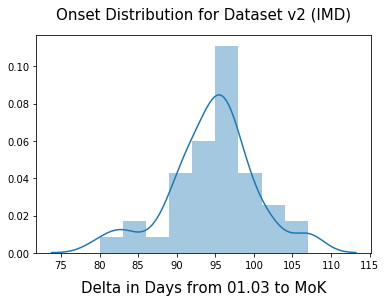

In [11]:
create_onset_hist(df_v2['imd_delta'], 'Onset Distribution for Dataset v2 (IMD)', 'onset_hist_v2_imd')

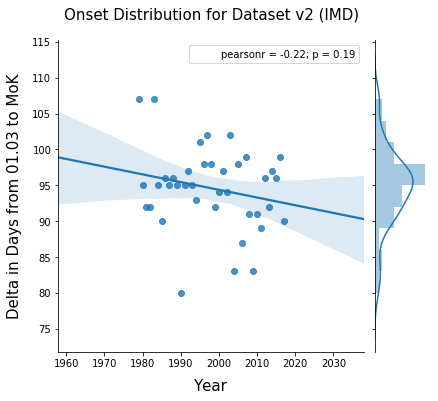

In [12]:
create_onset_jointplot(df_v2, 'imd_delta', 'Onset Distribution for Dataset v2 (IMD)', 'onset_joint_v2_imd')

The distribution according to objective criteria seems to be more *uniform* than *normal*. This might be caused by climate change and the fact that the recent onset dates were not calculated entirely the same. Nevertheless, this might actually work well for a classification task, as classes are well balanced.

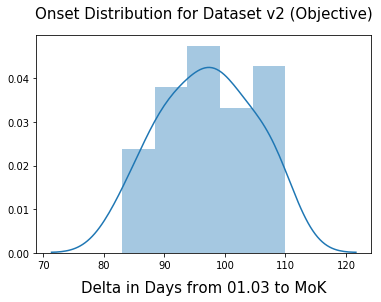

In [13]:
create_onset_hist(df_v2['obj_delta'], 'Onset Distribution for Dataset v2 (Objective)', 'onset_hist_v2_obj')

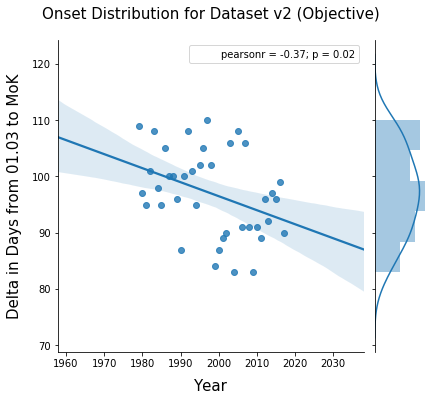

In [14]:
create_onset_jointplot(df_v2, 'obj_delta', 'Onset Distribution for Dataset v2 (Objective)', 'onset_joint_v2_obj')

In [15]:
df_v2[['year', 'imd_delta', 'obj_delta']].describe()

,year,imd_delta,obj_delta
count,39.000000,39.000000,39.000000
mean,1998.000000,94.589744,96.974359
std,11.401754,5.683392,7.634710
min,1979.000000,80.000000,83.000000
25%,1988.500000,92.000000,91.000000
50%,1998.000000,95.000000,97.000000
75%,2007.500000,97.500000,102.000000
max,2017.000000,107.000000,110.000000


In [16]:
df_v2['imd']

19    16 Jun 1979
20     4 Jun 1980
21     1 Jun 1981
22     1 Jun 1982
23    16 Jun 1983
24     4 Jun 1984
25    30 May 1985
26     5 Jun 1986
27     4 Jun 1987
28     5 Jun 1988
29     4 Jun 1989
30    20 May 1990
31     4 Jun 1991
32     6 Jun 1992
33     4 Jun 1993
34     2 Jun 1994
35    10 Jun 1995
36     7 Jun 1996
37    11 Jun 1997
38     7 Jun 1998
39     1 Jun 1999
40     3 Jun 2000
41     6 Jun 2001
42     3 Jun 2002
43    11 Jun 2003
44    23 May 2004
45     7 Jun 2005
46    27 May 2006
47     8 Jun 2007
48    31 May 2008
49    23 May 2009
50    31 May 2010
51    29 May 2011
52     5 Jun 2012
53     1 Jun 2013
54     6 Jun 2014
55     5 Jun 2015
56     8 Jun 2016
57    30 May 2017
Name: imd, dtype: object